## Q1) Extract reviews of any product from ecommerce website like amazon
## Q2) Perform emotion mining

In [3]:
pip install autoscraper

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=e41abb42f614916e4b6b3232ec53538177293924d80738457cbc154123ff227f
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [4]:
from autoscraper import AutoScraper

In [12]:
amazon_url = "https://www.amazon.com/OnePlus-Unlocked-Android-Smartphone-Charging/product-reviews/B07XWGWPH5/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

wanted_list = ["Holden","It phone make calls"]

In [13]:
scraper = AutoScraper()
result = scraper.build(amazon_url,wanted_list)
print(result)

['Holden', 'De Oppresso Liber', 'K. Newton', 'tt', 'Paul G', 'NtxivNeej', 'Kindle Customer', 'SuperDave', 'Thomas Cilloni', 'Darrin  S', 'It phone make calls', "This is a Super Nice phone. It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had. Having said that, it's very easy to setup. I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup. Keep in mind this phone does have a Setup Wizard which guides you throught the process. It does have a slot for expandable memory. The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G. I was conflicted between buying the N200 5G and N10 5G, both are very similar but personally I think the N200 5G is the better model. Do yourself a favor and spend an extra few dollars

In [14]:
scraper.get_result_similar(amazon_url,grouped=True)

{'rule_0zax': ['Holden',
  'De Oppresso Liber',
  'K. Newton',
  'tt',
  'Paul G',
  'NtxivNeej',
  'Kindle Customer',
  'SuperDave',
  'Thomas Cilloni',
  'Darrin  S'],
 'rule_nikf': ['Holden', 'Thomas Cilloni'],
 'rule_llph': ['It phone make calls',
  "This is a Super Nice phone. It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had. Having said that, it's very easy to setup. I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup. Keep in mind this phone does have a Setup Wizard which guides you throught the process. It does have a slot for expandable memory. The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G. I was conflicted between buying the N200 5G and N10 5G, both are very similar but personal

In [16]:
scraper.set_rule_aliases({"rule_llph":"Review"})
scraper.keep_rules(["rule_llph"])
scraper.save("amazon-search")

In [22]:
results = scraper.get_result_similar("https://www.amazon.com/OnePlus-Unlocked-Android-Smartphone-Charging/product-reviews/B07XWGWPH5/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews",group_by_alias=True)
results["Review"]

['It phone make calls',
 "This is a Super Nice phone. It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had. Having said that, it's very easy to setup. I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup. Keep in mind this phone does have a Setup Wizard which guides you throught the process. It does have a slot for expandable memory. The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G. I was conflicted between buying the N200 5G and N10 5G, both are very similar but personally I think the N200 5G is the better model. Do yourself a favor and spend an extra few dollars to buy the suggested phone protection case with a black surround. This phone is worth protecting the cameras on the back, against shoc

In [30]:
afinn = pd.read_csv("Afinn.csv", sep=",", encoding="latin-1")
afinn.shape

(2477, 2)

In [31]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [25]:
data = results["Review"]

In [28]:
import pandas as pd
import numpy as np
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [29]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences

['It phone make calls This is a Super Nice phone.',
 "It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had.",
 "Having said that, it's very easy to setup.",
 'I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup.',
 'Keep in mind this phone does have a Setup Wizard which guides you throught the process.',
 'It does have a slot for expandable memory.',
 'The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G.',
 'I was conflicted between buying the N200 5G and N10 5G, both are very similar but personally I think the N200 5G is the better model.',
 'Do yourself a favor and spend an extra few dollars to buy the suggested phone protection case with a black surround.',
 'This phone is worth protecting the c

In [34]:
review_df = pd.DataFrame(sentences, columns=["review_comments"])
review_df

,review_comments
0,It phone make calls This is a Super Nice phone.
1,"It has an advanced technology, operating syste..."
2,"Having said that, it's very easy to setup."
3,"I have AT&T as my carrier, I just swaped the s..."
4,Keep in mind this phone does have a Setup Wiza...
...,...
79,Buy Xiaomi This phone is not unlocked.
80,It is T-Mobile Only.
81,"I have sprint, and even though they are a merg..."
82,Sprint users- do not buy this phone.


In [36]:
affinity_score = afinn.set_index("word")["value"].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [50]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str=None):
    sent_score=0
    if text :
        sentence = nlp(text)
        for word in sentence:
             sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

calculate_sentiment(text = "amazing")

4

In [51]:
review_df["sentiment_value"] = review_df["review_comments"].apply(calculate_sentiment)

In [53]:
# How many words are in the sentences?

review_df["word_count"] = review_df["review_comments"].str.split().apply(len)
review_df["word_count"].head(10)

0    10
1    19
2     8
3    22
4    16
5     8
6    42
7    26
8    21
9    37
Name: word_count, dtype: int64

In [54]:
review_df.sort_values(by="sentiment_value").tail(10)

,review_comments,sentiment_value,word_count
10,I can't say enough about how impressive this p...,3,10
73,"!- The battery is huge and great, I can get a ...",3,22
48,Fingerprint reader works however not the best.,3,7
72,For fun I compared the camera with that of my ...,4,33
50,"But remember this is budget phone, and for thi...",4,17
56,I am not a power user of smart phones but of c...,4,32
9,This phone is worth protecting the cameras on ...,5,37
24,Great user friendly.,5,3
0,It phone make calls This is a Super Nice phone.,6,10
6,"The technology of this phone works great, I ha...",7,42


In [55]:
# Sentiment score of the whole review
review_df['sentiment_value'].describe()

count    84.000000
mean      0.738095
std       2.100597
min      -4.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       7.000000
Name: sentiment_value, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

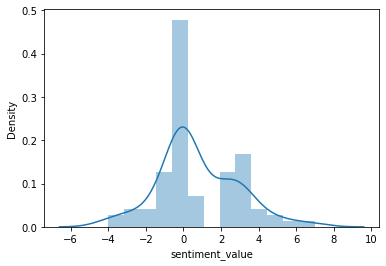

In [56]:
import seaborn as sns
sns.distplot(review_df["sentiment_value"])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

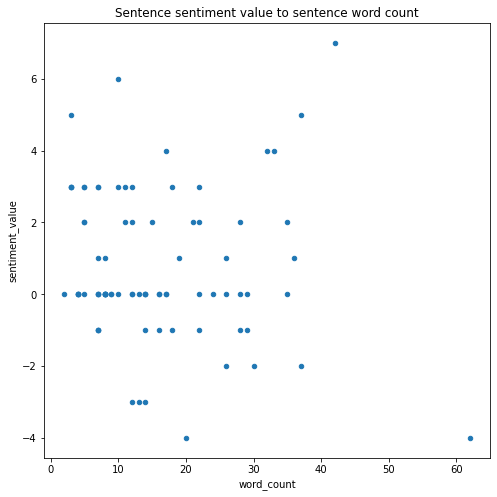

In [58]:
review_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [59]:
review_df

,review_comments,sentiment_value,word_count
0,It phone make calls This is a Super Nice phone.,6,10
1,"It has an advanced technology, operating syste...",1,19
2,"Having said that, it's very easy to setup.",1,8
3,"I have AT&T as my carrier, I just swaped the s...",0,22
4,Keep in mind this phone does have a Setup Wiza...,0,16
...,...,...,...
79,Buy Xiaomi This phone is not unlocked.,0,7
80,It is T-Mobile Only.,0,4
81,"I have sprint, and even though they are a merg...",0,24
82,Sprint users- do not buy this phone.,0,7
